In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
folder_number = '001'
file_number = 2
main_dir = f'Geolife Trajectories 1.3/Data/{folder_number}/Trajectory/'

In [95]:
some_file = os.listdir(main_dir)[file_number]

In [96]:
some_file

'20081024234405.plt'

In [97]:
sample = np.genfromtxt(main_dir+some_file,
                       skip_header=6, delimiter=',', dtype=None, encoding=None)

In [98]:
sample

array([(40.013812, 116.306483, 0, 156, 39745.98894676, '2008-10-24', '23:44:05'),
       (40.013763, 116.306421, 0, 189, 39745.98895833, '2008-10-24', '23:44:06'),
       (40.013984, 116.306307, 0, 127, 39745.99217593, '2008-10-24', '23:48:44'),
       ...,
       (40.013974, 116.30635 , 0, 106, 39746.47460648, '2008-10-25', '11:23:26'),
       (40.013808, 116.306486, 0,  99, 39746.47915509, '2008-10-25', '11:29:59'),
       (40.013816, 116.306483, 0,  99, 39746.47917824, '2008-10-25', '11:30:01')],
      dtype=[('f0', '<f8'), ('f1', '<f8'), ('f2', '<i4'), ('f3', '<i4'), ('f4', '<f8'), ('f5', '<U10'), ('f6', '<U8')])

In [99]:
len(sample)

7075

In [100]:
import datetime

noon = datetime.datetime(2022, 5, 13, 12, 0, 0)
dinner = datetime.datetime(2022, 5, 13, 18, 0, 0)

def trajectories_in_timespan(sample, start, end):
    trajectory_list = []
    for trajectory in sample:
        date = trajectory[5]
        date_split = date.split('-')
        time = trajectory[6]
        time_split = time.split(':')
        trajectory_time = datetime.datetime(int(date_split[0]), int(date_split[1]), int(date_split[2]), int(time_split[0]), int(time_split[1]), int(time_split[2]))
        if trajectory_time.time() >= start.time() and trajectory_time.time() < end.time():
            trajectory_list.append(trajectory)
    return np.asarray(trajectory_list)

trajectory_sample = trajectories_in_timespan(sample, noon, dinner)

print(len(trajectory_sample))
print(trajectory_sample)

0
[]


In [101]:
df = pd.DataFrame(data=sample)
df = df.rename(columns={"f0": "Latitude", "f1": "Longitude", "f2": "0", "f3": "Altitude", "f4": "Date (Days since 12/30/1899)","f5": "Date", "f6": "Time"})
df_coordinates = df[['Latitude', 'Longitude']]

BBox = ((df_coordinates.iloc[:,1].min(),   df_coordinates.iloc[:,1].max(),      
         df_coordinates.iloc[:,0].min(), df_coordinates.iloc[:,0].max()))
BBox = ((116.3047, 116.3407, 39.9705, 40.0175))
# Smallest values for latitude and longitude

beijing_map = plt.imread(f'map001.png')

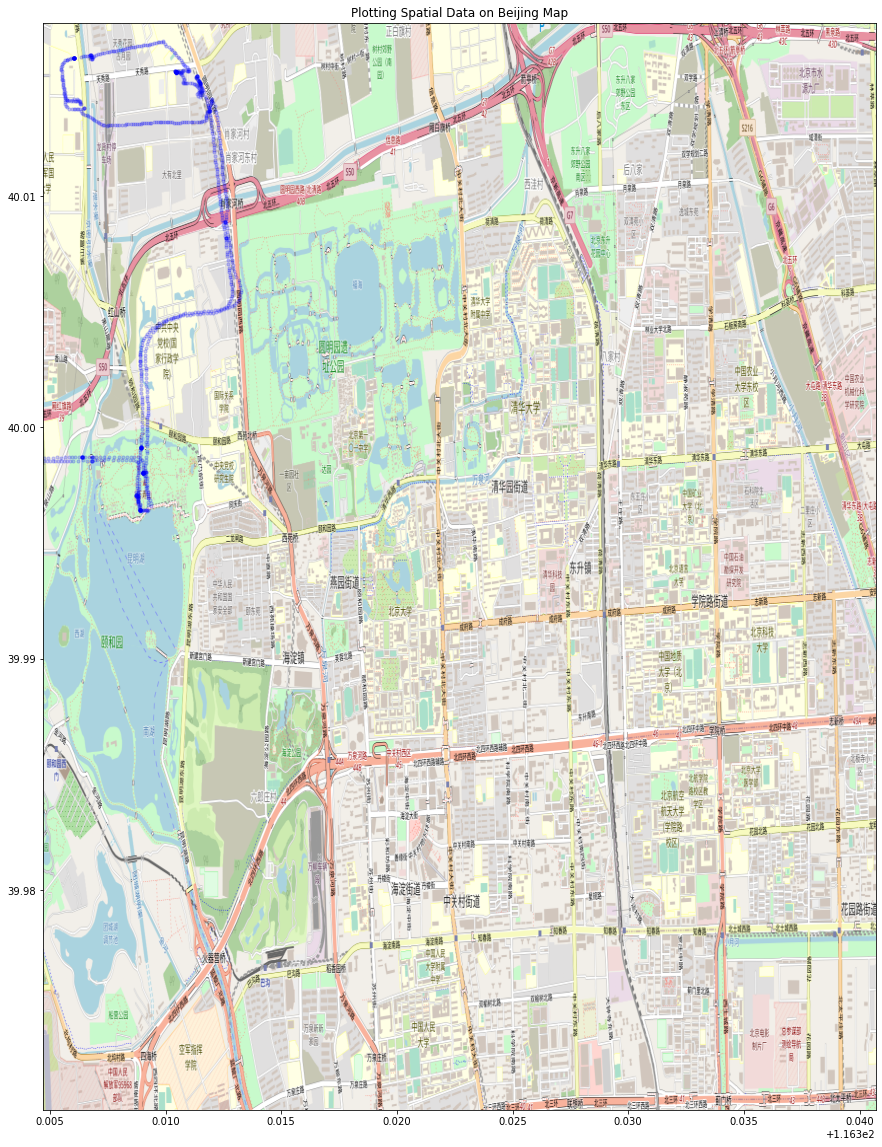

In [102]:
# Create map with data points
fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Beijing Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(beijing_map, extent = BBox)

In [103]:
data = df[['Latitude', 'Longitude']]

In [104]:
data

,Latitude,Longitude
0,40.013812,116.306483
1,40.013763,116.306421
2,40.013984,116.306307
3,40.014058,116.306319
4,40.014114,116.306285
...,...,...
7070,40.014106,116.306260
7071,40.014042,116.306310
7072,40.013974,116.306350
7073,40.013808,116.306486


In [110]:
from gtda.mapper import make_mapper_pipeline, MapperInteractivePlotter
from gtda.mapper import Eccentricity
from gtda.mapper.filter import Projection
from gtda.mapper.cover import CubicalCover

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering

In [106]:
scaler = MinMaxScaler()
transformed_data = scaler.fit_transform(data)
transformed_data

array([[0.90013817, 0.95980712],
       [0.8984456 , 0.95943849],
       [0.90607945, 0.95876068],
       ...,
       [0.90573402, 0.95901634],
       [0.9       , 0.95982496],
       [0.90027634, 0.95980712]])

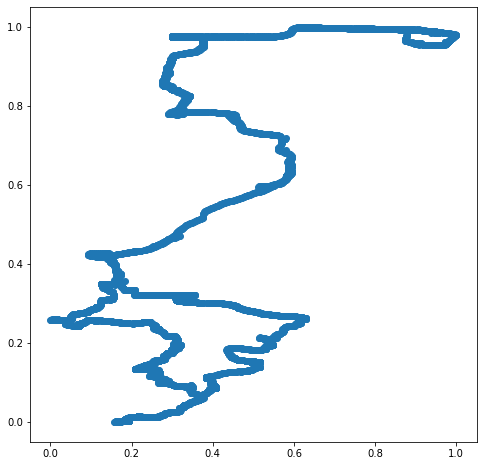

In [107]:
plt.figure(figsize=(8,8))
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.show()

In [114]:
scaler = MinMaxScaler()
filter_func = Projection(columns=[0, 1])
cover = CubicalCover(n_intervals=20, overlap_frac=0.3)
clusterer = DBSCAN()

pipe = make_mapper_pipeline(
    scaler=scaler,
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer)

plotter = MapperInteractivePlotter(pipe, data)
plotter.plot()